# Introduction

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. .

In this project, we'll answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [2]:
dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [8]:
duplicate_dete = dete_survey.duplicated()
duplicate_dete.value_counts()

False    822
dtype: int64

In [9]:
duplicate_tafe = tafe_survey.duplicated()
duplicate_tafe.value_counts()

False    702
dtype: int64

In order to answer the above questions, it will be necessary to change the type of some values (age to integer). It will be important to clean the null values and keep only the values important for the analysis.
Both dataframes have columns with the same type of information, but the columns name differ. This will need to be updated. There are no duplicated values. "Not stated" values in the dete_survey dataframe should be converted to "NaN" values.

In [10]:
#fixing missing values in dete survey
dete_survey = pd.read_csv("dete_survey.csv", na_values = ["Not Stated"])

In [11]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
#removing unnecessary columns from dataframes - not needed for analysis
dete_survey_columns_drop = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(dete_survey_columns_drop, axis = 1)

tafe_survey_columns_drop = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(tafe_survey_columns_drop, axis =1)

In [13]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [14]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

As we can observe above, the two dataframes have the same type of columns, but their name differ. An initial cleanup will include: capitalization is lowercase, no trailing whitespace, spaces replaced by underscores. The tafe_survey_updated dataframe will also see some of their columns' names shorten.

In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_").str.replace("separationtype", "separation_type")

In [16]:
dete_survey_updated.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [17]:
tafe_survey_updated = tafe_survey_updated.rename(columns = {"Gender. What is your Gender?":"gender", "Record ID": "id", "CESSATION YEAR" : "cease_date", "Reason for ceasing employment":"separation_type", "Gender. What is your Gender":"gender", "CurrentAge. Current Age": 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [18]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.strip().str.replace("workarea", "work_area")

In [19]:
tafe_survey_updated.columns

Index(['id', 'institute', 'work_area', 'cease_date', 'separation_type',
       'contributing factors. career move - public sector',
       'contributing factors. career move - private sector',
       'contributing factors. career move - self-employment',
       'contributing factors. ill health',
       'contributing factors. maternity/family',
       'contributing factors. dissatisfaction',
       'contributing factors. job dissatisfaction',
       'contributing factors. interpersonal conflict',
       'contributing factors. study', 'contributing factors. travel',
       'contributing factors. other', 'contributing factors. none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

To answer this project's questions, we can remove employee who retired or had their contract finished from the analysis.  
As such, these cases were remmoved from the separation_type column

In [20]:
dete_survey_updated["separation_type"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [21]:
tafe_survey_updated["separation_type"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

In [22]:
dete_resignations = dete_survey_updated[dete_survey_updated["separation_type"].str.contains("Resignation")]

In [23]:
dete_resignations["separation_type"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separation_type, dtype: int64

In [24]:
dete_survey_updated = dete_resignations.reset_index()

In [25]:
dete_survey_updated.head()

,index,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
4,11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [26]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated.separation_type == "Resignation"]

In [27]:
tafe_resignations["separation_type"].value_counts()

Resignation    340
Name: separation_type, dtype: int64

In [28]:
tafe_survey_updated = tafe_resignations.reset_index()

In [29]:
tafe_survey_updated.head()

,index,id,institute,work_area,cease_date,separation_type,contributing factors. career move - public sector,contributing factors. career move - private sector,contributing factors. career move - self-employment,contributing factors. ill health,...,contributing factors. study,contributing factors. travel,contributing factors. other,contributing factors. none,gender,age,employment_status,position,institute_service,role_service
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Next step involves cleaning the year columns

In [30]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [31]:
#extract the year & convert to a float

In [32]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(r'([1-2][0-9][0-9][0-9])').astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [33]:
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [34]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [35]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

Tafe resignations dataframe already has an institute_service column where the number of years in service is calculated. A similar column needs to be created for the dete_resignations dataframe.

In [36]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In [37]:
dete_resignations["institute_service"].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In the next step, we'll identify any employees who resigned because they were dissatisfied. If the employee indicated any of the following factors to resigned, it will be marked as "dissatisfied" in a new column.

tafe_survey_updated:

Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction

dafe_survey_updated:

job_dissatisfaction
dissatisfaction_with_the_department
physical_work_environment
lack_of_recognition
lack_of_job_security
work_location
employment_conditions
work_life_balance
workload


In [38]:
tafe_resignations["contributing factors. dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: contributing factors. dissatisfaction, dtype: int64

In [39]:
tafe_resignations["contributing factors. job dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: contributing factors. job dissatisfaction, dtype: int64

In [40]:
def update_vals(val):
    if val == "-":
        return False
    if pd.isnull(val):
        return np.nan
    else:
        return True


In [41]:
tafe_resignations["dissatisfied"] = tafe_resignations[["contributing factors. dissatisfaction", "contributing factors. job dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
print(tafe_resignations_up["dissatisfied"].value_counts(dropna=False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


In [42]:
dete_resignations["dissatisfied"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
print(dete_resignations_up["dissatisfied"].value_counts(dropna=False))

False    162
True     149
Name: dissatisfied, dtype: int64


In [43]:
tafe_resignations.columns

Index(['id', 'institute', 'work_area', 'cease_date', 'separation_type',
       'contributing factors. career move - public sector',
       'contributing factors. career move - private sector',
       'contributing factors. career move - self-employment',
       'contributing factors. ill health',
       'contributing factors. maternity/family',
       'contributing factors. dissatisfaction',
       'contributing factors. job dissatisfaction',
       'contributing factors. interpersonal conflict',
       'contributing factors. study', 'contributing factors. travel',
       'contributing factors. other', 'contributing factors. none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

In [44]:
dete_resignations.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied'],
      dtype='object')

Before combining the dataframes, let´s add a column that allow us to distinguish the two institutes:

In [45]:
dete_resignations_up["institute"] = "DETE"

In [46]:
tafe_resignations_up["institute"] = "TAFE"


Combining the dataframes and aggregating the data according to the "institute_service" column:

In [47]:
combined = pd.concat([tafe_resignations_up, dete_resignations_up],axis=0, ignore_index = True)

In [48]:
combined.shape

(651, 52)

In [49]:
#drop columns with less than 500 null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [50]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separation_type
0,NaN,2010.0,False,NaN,NaN,6.341399e+17,TAFE,NaN,NaN,Resignation
1,41 45,2010.0,False,Permanent Full-time,Male,6.341466e+17,TAFE,3-4,Teacher (including LVT),Resignation
2,56 or older,2010.0,False,Contract/casual,Female,6.341475e+17,TAFE,7-10,Teacher (including LVT),Resignation
3,20 or younger,2010.0,False,Temporary Full-time,Male,6.341520e+17,TAFE,3-4,Administration (AO),Resignation
4,46 50,2010.0,False,Permanent Full-time,Male,6.341537e+17,TAFE,3-4,Teacher (including LVT),Resignation


We will need to clean the "institute_service" column as the values are not floats

In [51]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
10.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
30.0                   2
28.0                   2
25.0                   2
26.0                   2
36.0                   2


In [52]:
#extract the year of service and convert it to a float
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype(str).str.extract(r"(\d+)")
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [53]:
combined_updated["institute_service_up"].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
9.0      14
2.0      14
8.0       8
13.0      8
15.0      7
22.0      6
14.0      6
17.0      6
12.0      6
10.0      6
18.0      5
16.0      5
23.0      4
24.0      4
21.0      3
19.0      3
32.0      3
39.0      3
30.0      2
26.0      2
36.0      2
28.0      2
25.0      2
35.0      1
38.0      1
34.0      1
33.0      1
49.0      1
41.0      1
27.0      1
42.0      1
29.0      1
31.0      1
Name: institute_service_up, dtype: int64

According to an article writen by Business Wire on why employees leave their jobs, understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [54]:
def career_stage(val):
    if val >= 3 and val <=6:
        return "Experienced"
    elif 7 <= val <= 10:
        return "Established"
    elif val <= 11:
        return "Veteran"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"


In [55]:
#create new column where the the time in service can be seen
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(career_stage)

### initial analysis

In [56]:
combined_updated["dissatisfied"].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [57]:
#replace NaN values with most common value
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(value=False)

In [60]:
pivot_table = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

In [62]:
pivot_table

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.556604
Veteran,0.286996


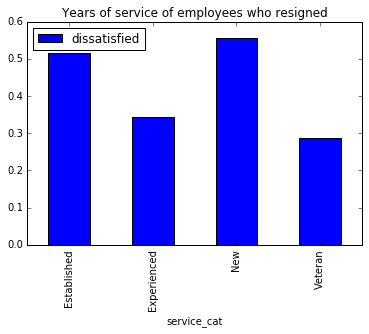

In [64]:
%matplotlib inline
pivot_table.plot(kind="bar", title="Years of service of employees who resigned")

We can see that new employees (who have worked at the institutions for less than 3 years) along with those who have worked for a period of 7 to 10 years, are resigning the most.